In [14]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [15]:
#convert .csv files into DFs
College_Rankings_legend = pd.read_csv('../data/Colleges_by_MinutesPlayed.csv')
draft_withRankings = pd.read_csv('../data/Draft_withRankings.csv')
Top50Schools = pd.read_csv('../data/Top50Schools.csv')


In [16]:
Top50Schools.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,college_rank
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,33
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,1
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,3
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,7
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,2


In [ ]:
#look at correlations between variables
Top50Schools.corr(numeric_only=True)

**Regressions for All Measures**
- Performance (Points per game)
- Longevity (years active)
- Team Contribution (win shares per 48 minutes)
- Desirability (overall pick)

In [18]:
# college rank on PPG
# x is now the variable for the college rankings
CR = Top50Schools.groupby(['college_rank'])['college_rank'].mean()
y = Top50Schools.groupby(['college_rank'])['points_per_game'].mean()

CR = sm.add_constant(CR)

#create the model
model = sm.OLS(y, CR)
regressionPPG = model.fit()

#seems to be good fit p = 0.00 < 0.05, R-sq = 0.261
print(regressionPPG.summary())

                            OLS Regression Results                            
Dep. Variable:        points_per_game   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     16.96
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           0.000150
Time:                        20:11:39   Log-Likelihood:                -73.178
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.7461      0.297     29.411   

In [19]:
#college rank on overall pick
y = Top50Schools.groupby(['college_rank'])['overall_pick'].mean()

CR = sm.add_constant(CR)

#create the model
model = sm.OLS(y, CR)
regressionOP = model.fit()

#seems to be good fit p = 0.002 < 0.05, R-sq = 0.184
print(regressionOP.summary())

                            OLS Regression Results                            
Dep. Variable:           overall_pick   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 02 Nov 2023   Prob (F-statistic):            0.00191
Time:                        20:11:39   Log-Likelihood:                -144.77
No. Observations:                  50   AIC:                             293.5
Df Residuals:                      48   BIC:                             297.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4966      1.245     18.874   

In [20]:
#college rank on years active 
y = Top50Schools.groupby(['college_rank'])['years_active'].mean()

CR = sm.add_constant(CR)

#create the model
model = sm.OLS(y, CR)
regressionYA = model.fit()

#seems to be good fit p = 0.011 < 0.05, R-sq = 0.127
print(regressionYA.summary())

                            OLS Regression Results                            
Dep. Variable:           years_active   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     6.954
Date:                Thu, 02 Nov 2023   Prob (F-statistic):             0.0112
Time:                        20:11:39   Log-Likelihood:                -79.420
No. Observations:                  50   AIC:                             162.8
Df Residuals:                      48   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.5437      0.337     22.390   

In [21]:
#college rank on win shares per 48 minutes 
y = Top50Schools.groupby(['college_rank'])['win_shares_per_48_minutes'].mean()

CR = sm.add_constant(CR)

#create the model
model = sm.OLS(y, CR)
regressionWS = model.fit()

#seems to be good fit p = 0.001 < 0.05, R-sq = 0.2
print(regressionWS.summary())

                                OLS Regression Results                               
Dep. Variable:     win_shares_per_48_minutes   R-squared:                       0.200
Model:                                   OLS   Adj. R-squared:                  0.183
Method:                        Least Squares   F-statistic:                     11.98
Date:                       Thu, 02 Nov 2023   Prob (F-statistic):            0.00114
Time:                               20:11:39   Log-Likelihood:                 127.10
No. Observations:                         50   AIC:                            -250.2
Df Residuals:                             48   BIC:                            -246.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

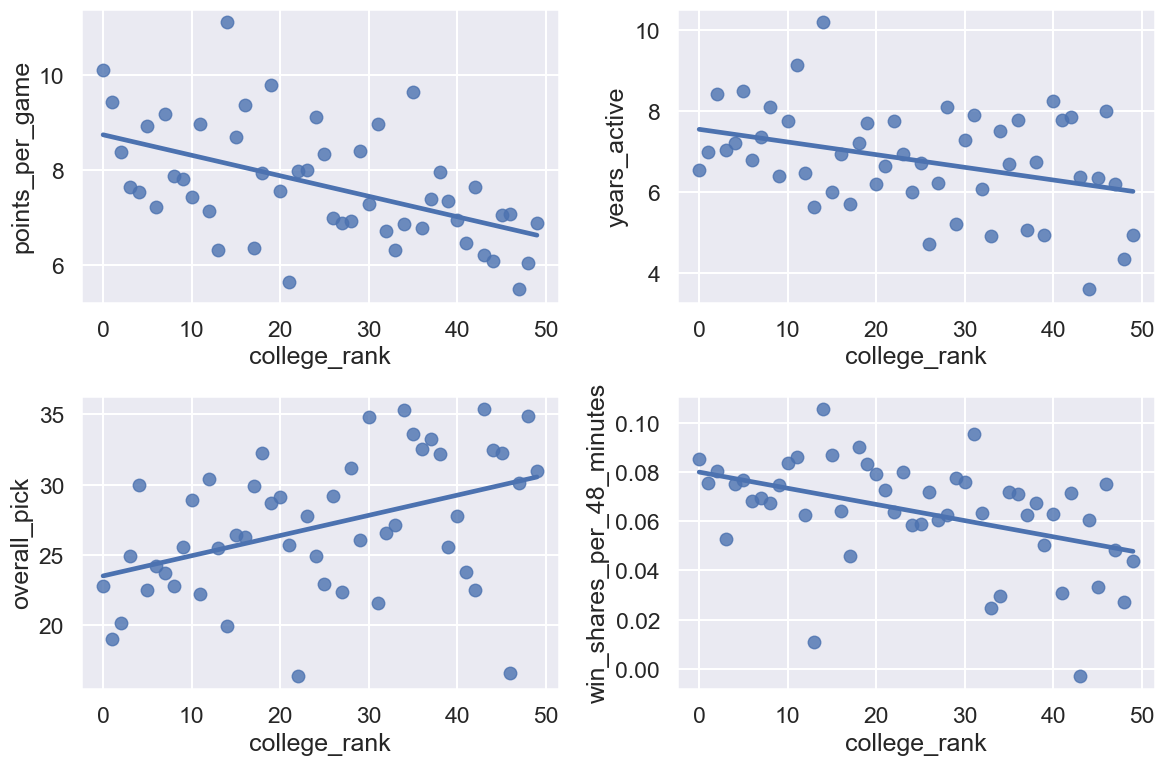

In [23]:
#Plot regressions with Line of Best Fit

#set theme
sns.set_theme(style = 'darkgrid', context = 'talk')

#create a variable for college rank that will be used for the x-axis
CR=Top50Schools.groupby(['college_rank'])['college_rank'].mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
#sum the relationship is much more apparent
#bar graphs wook too

sns.regplot(ax=axes[0,0] ,x =CR , y = Top50Schools.groupby(['college_rank'])['points_per_game'].mean(), ci=None)
sns.regplot(ax=axes[0,1] ,x =CR , y = Top50Schools.groupby(['college_rank'])['years_active'].mean(), ci=None)
sns.regplot(ax=axes[1,0] ,x =CR , y = Top50Schools.groupby(['college_rank'])['overall_pick'].mean(), ci=None)
sns.regplot(ax=axes[1,1] ,x =CR , y = Top50Schools.groupby(['college_rank'])['win_shares_per_48_minutes'].mean(), ci=None)

#clean layout
plt.tight_layout()

#save image
plt.savefig('../images/CollegeRegressions_LOBF.png')

plt.show()

**Examining Residual/Errors**

In [32]:
#defining residuals
residualPPG = regressionPPG.resid
residualYA = regressionYA.resid
residualOP = regressionOP.resid
residualWS = regressionWS.resid

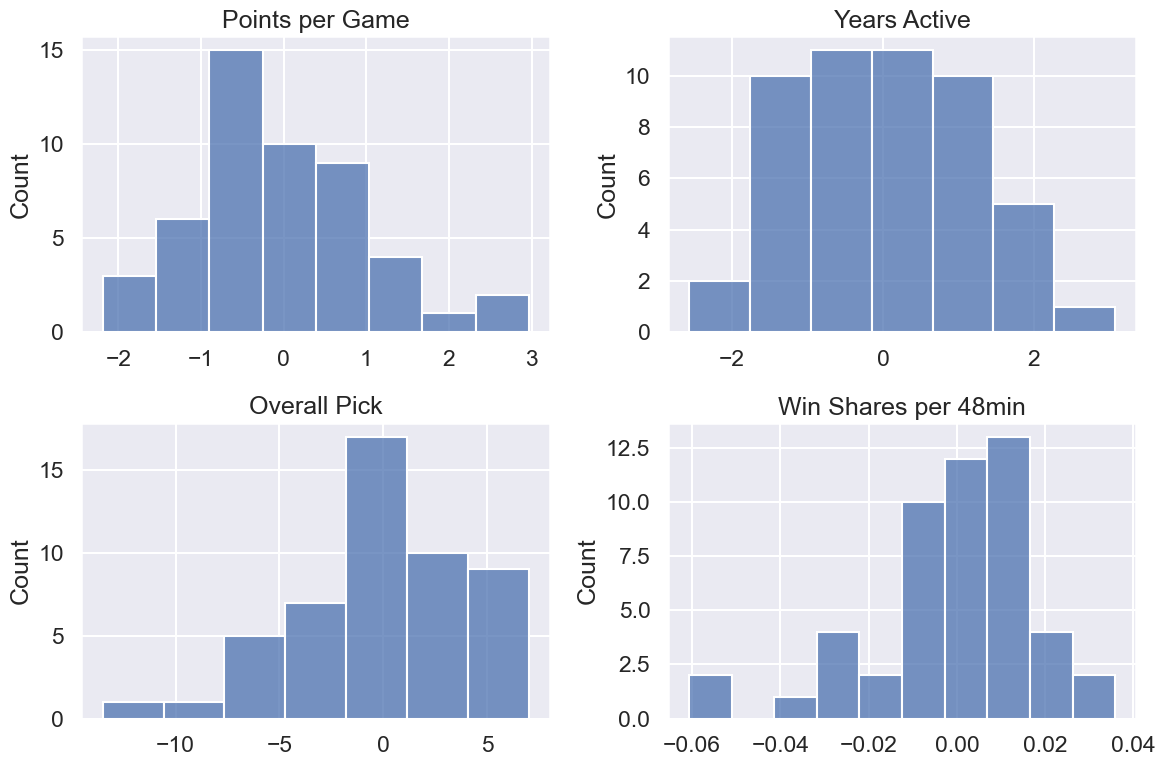

In [34]:
#create histograms of residuals from all regression
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.histplot(ax = axes[0,0], data = residualPPG).set(title = 'Points per Game')
sns.histplot(ax = axes[0,1], data = residualYA).set(title = 'Years Active')
sns.histplot(ax = axes[1,0], data = residualOP).set(title = 'Overall Pick')
sns.histplot(ax = axes[1,1], data = residualWS).set(title = 'Win Shares per 48min')

plt.tight_layout()

plt.savefig('../images/ResidualDist.png')


The histograms appear to depict a normal distribution of errors for all the regressions ran